In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [235]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df=pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df=df.copy()

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [237]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [238]:
corr=df.describe().corr()
sns.heatmap(data=corr,annot=True,fmt="f")

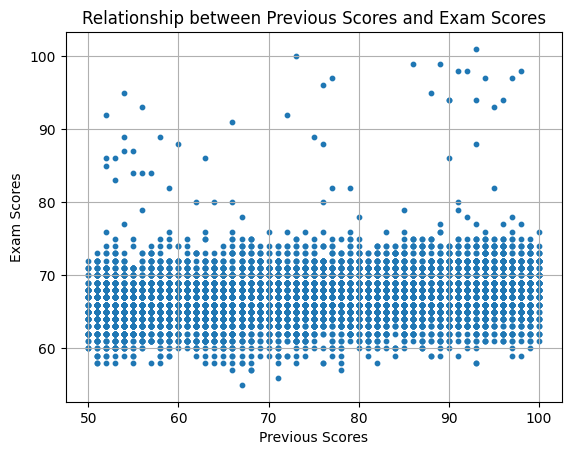

In [240]:
x=df["Previous_Scores"]
y=df["Exam_Score"]

plt.scatter(x, y,s=10)
plt.xlabel('Previous Scores')
plt.ylabel('Exam Scores')
plt.title('Relationship between Previous Scores and Exam Scores')

plt.grid(True)
plt.show()


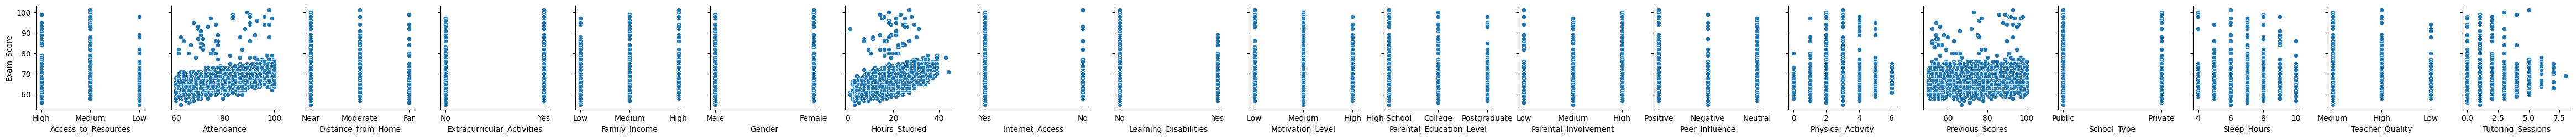

In [241]:

sns.pairplot(df, x_vars=df.columns.difference(['Exam_Score']), y_vars=['Exam_Score'])
plt.show()


Outlier Values

In [242]:

from scipy import stats
z_scores = np.abs(stats.zscore(df[['Previous_Scores', 'Exam_Score',"Attendance","Hours_Studied"]])) 
df = df[(z_scores < 3).all(axis=1)]  


In [243]:
df.select_dtypes(include=["category","object"])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [244]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()


df["Parental_Involvement"]=enc.fit_transform(df["Parental_Involvement"])
df["Access_to_Resources"]=enc.fit_transform(df["Access_to_Resources"])
df["Motivation_Level"]=enc.fit_transform(df["Motivation_Level"])
df["Family_Income"]=enc.fit_transform(df["Family_Income"])
df["Teacher_Quality"]=enc.fit_transform(df["Teacher_Quality"])
df["Peer_Influence"]=enc.fit_transform(df["Peer_Influence"])


df=pd.get_dummies(df,columns=["Extracurricular_Activities","Internet_Access","School_Type","Learning_Disabilities","Parental_Education_Level","Distance_from_Home","Gender"],drop_first=True)


df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,...,67,False,True,True,False,True,False,False,True,True
1,19,64,1,2,8,59,1,2,2,2,...,61,False,True,True,False,False,False,True,False,False
2,24,98,2,2,7,91,2,2,2,2,...,74,True,True,True,False,False,True,False,True,True
3,29,89,1,2,8,98,2,1,2,2,...,71,True,True,True,False,True,False,True,False,True
4,19,92,2,2,6,65,2,3,2,0,...,70,True,True,True,False,False,False,False,True,False


In [245]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Exam_Score
count,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000
mean,19.955144,79.967697,1.221984,1.204685,7.030465,75.078996,1.308634,1.493264,1.212186,1.323944,1.191366,2.970759,67.058941
std,5.881620,11.545614,0.865307,0.871409,1.467399,14.385580,0.781993,1.232236,0.742431,0.911699,0.755401,1.030348,3.325000
min,3.000000,60.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000
25%,16.000000,70.000000,0.000000,0.000000,6.000000,63.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,7.000000,75.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,8.000000,88.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,69.000000
max,37.000000,100.000000,2.000000,2.000000,10.000000,100.000000,2.000000,8.000000,2.000000,3.000000,2.000000,6.000000,78.000000


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6532 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6532 non-null   int64
 1   Attendance                             6532 non-null   int64
 2   Parental_Involvement                   6532 non-null   int64
 3   Access_to_Resources                    6532 non-null   int64
 4   Sleep_Hours                            6532 non-null   int64
 5   Previous_Scores                        6532 non-null   int64
 6   Motivation_Level                       6532 non-null   int64
 7   Tutoring_Sessions                      6532 non-null   int64
 8   Family_Income                          6532 non-null   int64
 9   Teacher_Quality                        6532 non-null   int64
 10  Peer_Influence                         6532 non-null   int64
 11  Physical_Activity                  

In [248]:
df.isna().sum()

Hours_Studied                            0
Attendance                               0
Parental_Involvement                     0
Access_to_Resources                      0
Sleep_Hours                              0
Previous_Scores                          0
Motivation_Level                         0
Tutoring_Sessions                        0
Family_Income                            0
Teacher_Quality                          0
Peer_Influence                           0
Physical_Activity                        0
Exam_Score                               0
Extracurricular_Activities_Yes           0
Internet_Access_Yes                      0
School_Type_Public                       0
Learning_Disabilities_Yes                0
Parental_Education_Level_High School     0
Parental_Education_Level_Postgraduate    0
Distance_from_Home_Moderate              0
Distance_from_Home_Near                  0
Gender_Male                              0
dtype: int64

In [249]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Exam_Score
count,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000
mean,19.955144,79.967697,1.221984,1.204685,7.030465,75.078996,1.308634,1.493264,1.212186,1.323944,1.191366,2.970759,67.058941
std,5.881620,11.545614,0.865307,0.871409,1.467399,14.385580,0.781993,1.232236,0.742431,0.911699,0.755401,1.030348,3.325000
min,3.000000,60.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000
25%,16.000000,70.000000,0.000000,0.000000,6.000000,63.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,7.000000,75.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,8.000000,88.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,69.000000
max,37.000000,100.000000,2.000000,2.000000,10.000000,100.000000,2.000000,8.000000,2.000000,3.000000,2.000000,6.000000,78.000000


In [250]:


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

y=df["Exam_Score"]
x=df.drop(columns=["Exam_Score"])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.3,random_state=0)
model=LinearRegression()

model.fit(x_train,y_train)


model.score(x_test,y_test)




0.898796837427843

In [253]:
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Parametre aralıkları
params = {
    "criterion": ["squared_error", "absolute_error"],  # Geçerli kriterler
    "n_estimators": [20, 50, 100, 200, 300, 400, 500, 800, 1000],
    "max_depth": np.arange(3, 50),
    "min_samples_split": np.arange(2, 1000),  # min_samples_split en az 2 olmalı
    "max_features": ["sqrt", "log2"],
    "max_samples": np.linspace(0.1, 0.9, 10)
}

# RandomizedSearchCV ile model eğitimi
rand_search = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, scoring="neg_mean_squared_error", random_state=0, cv=5)
rand_search.fit(x_train, y_train)

# En iyi parametreleri ve performansı gösterme
rand_params = rand_search.best_params_
print(rand_params, "\n")
print("Train MSE:", -rand_search.best_score_)  # Negatif işaretli olduğu için - ile çarpıyoruz

# Test seti üzerinde tahmin
preds = rand_search.predict(x_test)

# Performans değerlendirme
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("Test MSE:", mse)
print("Test R^2 Score:", r2)"""


{'n_estimators': 50, 'min_samples_split': np.int64(56), 'max_samples': np.float64(0.18888888888888888), 'max_features': 'log2', 'max_depth': np.int64(45), 'criterion': 'squared_error'} 

Train MSE: 4.232065978046363
Test MSE: 4.045460797949469
Test R^2 Score: 0.6315332735527228


In [257]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,...,67,False,True,True,False,True,False,False,True,True
1,19,64,1,2,8,59,1,2,2,2,...,61,False,True,True,False,False,False,True,False,False
2,24,98,2,2,7,91,2,2,2,2,...,74,True,True,True,False,False,True,False,True,True
3,29,89,1,2,8,98,2,1,2,2,...,71,True,True,True,False,True,False,True,False,True
4,19,92,2,2,6,65,2,3,2,0,...,70,True,True,True,False,False,False,False,True,False


In [270]:

model.predict(df.iloc[90,:-1].values.reshape(1, -1))


array([70.03452612])

In [271]:
df.iloc[90,:-1]

Hours_Studied                               21
Attendance                                  60
Parental_Involvement                         0
Access_to_Resources                          2
Sleep_Hours                                  7
Previous_Scores                             80
Motivation_Level                             2
Tutoring_Sessions                            0
Family_Income                                2
Teacher_Quality                              0
Peer_Influence                               1
Physical_Activity                            4
Exam_Score                                  64
Extracurricular_Activities_Yes           False
Internet_Access_Yes                       True
School_Type_Public                        True
Learning_Disabilities_Yes                 True
Parental_Education_Level_High School     False
Parental_Education_Level_Postgraduate    False
Distance_from_Home_Moderate              False
Distance_from_Home_Near                   True
Name: 90, dty

In [286]:
for i in range(90, 120):
    input_data = df.iloc[i, :-1].values.reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)  
    prediction = model.predict(input_data_scaled)
    print(f"For Index {i}  prediction: {prediction}")


For Index 90  prediction: [65.44429368]
For Index 91  prediction: [66.62189828]
For Index 92  prediction: [68.04379096]
For Index 93  prediction: [68.35020835]
For Index 94  prediction: [68.03189728]
For Index 95  prediction: [65.35057998]
For Index 96  prediction: [67.02227017]
For Index 97  prediction: [66.32392654]
For Index 98  prediction: [65.01217387]
For Index 99  prediction: [67.96313195]
For Index 100  prediction: [64.69575119]
For Index 101  prediction: [65.91976477]
For Index 102  prediction: [67.44537539]
For Index 103  prediction: [65.25901805]
For Index 104  prediction: [69.059209]
For Index 105  prediction: [69.51878209]
For Index 106  prediction: [67.50926285]
For Index 107  prediction: [65.7728611]
For Index 108  prediction: [66.89806908]
For Index 109  prediction: [65.40752896]
For Index 110  prediction: [66.07642287]
For Index 111  prediction: [65.86554105]
For Index 112  prediction: [64.90960966]
For Index 113  prediction: [69.24722538]
For Index 114  prediction: [6

C:\Users\Ömer Taha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Ömer Taha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Ömer Taha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Ömer Taha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Ömer Taha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  

In [287]:
for i in range(90, 120):
    actual_score = df.iloc[i]["Exam_Score"]  
    print(f"Index {i} - Real Exam_Score: {actual_score}")


Index 90 - Real Exam_Score: 64
Index 91 - Real Exam_Score: 63
Index 92 - Real Exam_Score: 71
Index 93 - Real Exam_Score: 69
Index 94 - Real Exam_Score: 68
Index 95 - Real Exam_Score: 62
Index 96 - Real Exam_Score: 68
Index 97 - Real Exam_Score: 66
Index 98 - Real Exam_Score: 64
Index 99 - Real Exam_Score: 67
Index 100 - Real Exam_Score: 65
Index 101 - Real Exam_Score: 65
Index 102 - Real Exam_Score: 69
Index 103 - Real Exam_Score: 63
Index 104 - Real Exam_Score: 72
Index 105 - Real Exam_Score: 76
Index 106 - Real Exam_Score: 69
Index 107 - Real Exam_Score: 67
Index 108 - Real Exam_Score: 69
Index 109 - Real Exam_Score: 63
Index 110 - Real Exam_Score: 67
Index 111 - Real Exam_Score: 66
Index 112 - Real Exam_Score: 64
Index 113 - Real Exam_Score: 73
Index 114 - Real Exam_Score: 63
Index 115 - Real Exam_Score: 65
Index 116 - Real Exam_Score: 73
Index 117 - Real Exam_Score: 70
Index 118 - Real Exam_Score: 68
Index 119 - Real Exam_Score: 65
